# Análises

**Bibliotecas importadas**

In [1]:
from time import sleep
import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/labfis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

/tmp/ipykernel_18117/4291788097.py:3: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [3]:
plt.style.use('seaborn')
plt.rcParams["font.family"] = "serif"

## Importação dos arquivos de dados

In [4]:
def importar_arquivos():
    src_dir = os.getcwd()
    data_dir = os.path.join(src_dir.replace('src', 'data'))

    df = pd.DataFrame()
    for f in os.listdir(data_dir):
        try:
            df = pd.concat([df, pd.read_csv(os.path.join(data_dir, f))])
        except:
            pass
    df.drop_duplicates(inplace=True)
    df['Data de Publicação'] = pd.to_datetime(df['Data de Publicação'], format='%Y-%m-%d')
    df['Palavras-chave'] = df['Palavras-chave'].fillna('')
    df = df[df['Data de Publicação'] >= '2012']
    return df

In [5]:
df = importar_arquivos()

In [6]:
qtd_artigos = df.shape[0]
print(f'Foram encontrados {qtd_artigos} artigos.')

Foram encontrados 372 artigos.


In [7]:
df.head()

,Data de Publicação,Título,Resumo,Palavras-chave,Qtd. de Autores,Autor 1,Autor 2,Autor 3,Autor 4,Autor 5,...,Afilição 6,Url Artigo,Revista,Afiliação 1,Afiliação 2,Afiliação 3,Afiliação 4,Afiliação 5,Afiliação 6,url
0,2018-01-01,UMA ANÁLISE ACERCA DAS MUDANÇAS NA CONTABILIZA...,Levando em consideração as alterações do métod...,Ativos Biológicos. Ativos Biológicos Portadore...,3,Arthur Frederico Lerner,Vanessa Noguez Machado,Romina Batista de Lucena de Souza,NaN,NaN,...,NaN,https://periodicos.ufpe.br/revistas/ricontabei...,Revista de Informação Contábil – RIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,NÍVEL DE EVIDENCIAÇÃO AMBIENTAL DAS COMPANHIAS...,O presente estudo tem como objetivo verificar ...,NBC T-15. Setor siderúrgico. Evidenciação Ambi...,3,Marcos Antônio Ferreira do Patrocínio,Alex Martins Moura,Adriana Rodrigues Silva,NaN,NaN,...,NaN,https://periodicos.ufpe.br/revistas/ricontabei...,Revista de Informação Contábil – RIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,RECONHECIMENTO E EVIDENCIAÇÃO DE RECEITAS: O ...,Esse estudo teve como objetivo buscar o entend...,Organizações Sociais. Receitas Operacionais. R...,3,Ana Beatriz Gonçalves de Carvalho,Abimael de Jesus Barros Costa,Bruno Vinícius Ramos Fernandes,NaN,NaN,...,NaN,https://periodicos.ufpe.br/revistas/ricontabei...,Revista de Informação Contábil – RIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-01,ANÁLISE DE SUSTENTABILIDADE AMBIENTAL: ESTUDO ...,Considerando a importância da sustentabilidade...,Responsabilidade Social. Sustentabilidade e Es...,3,Eduardo Coelho,Daniela Di Domênico,Elisete Dahmer Pfitscher,NaN,NaN,...,NaN,https://periodicos.ufpe.br/revistas/ricontabei...,Revista de Informação Contábil – RIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,INDICADORES DE DESEMPENHO AMBIENTAL: UM ESTUDO...,O objetivo do estudo foi analisar a produção d...,Indicadores de desempenho. Indicadores ambient...,3,DANIELA FAGUNDES CARNELÓS NUNES,EMANUELLI MARIANA MAINGUÉ,EDWIN VLADIMIR CARDOZA GALDAMEZ,NaN,NaN,...,NaN,https://periodicos.ufpe.br/revistas/ricontabei...,Revista de Informação Contábil – RIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['Data de Publicação', 'Título', 'Resumo', 'Palavras-chave',
       'Qtd. de Autores', 'Autor 1', 'Autor 2', 'Autor 3', 'Autor 4',
       'Autor 5', 'Autor 6', 'Afilição 1', 'Afilição 2', 'Afilição 3',
       'Afilição 4', 'Afilição 5', 'Afilição 6', 'Url Artigo', 'Revista',
       'Afiliação 1', 'Afiliação 2', 'Afiliação 3', 'Afiliação 4',
       'Afiliação 5', 'Afiliação 6', 'url'],
      dtype='object')

In [9]:
periodicos

NameError: name 'periodicos' is not defined

In [10]:
def func(x):
    periodicos = pd.read_csv('../periodicos_anpcont.csv')
    dic = dict(zip(periodicos['Revista'], periodicos['QUALIS']))
    return dic[x]

func('Brazilian Business Review – BBR')

'A2'

In [11]:
df['Qualis'] = df['Revista'].apply(func)
df.head()

,Data de Publicação,Título,Resumo,Palavras-chave,Qtd. de Autores,Autor 1,Autor 2,Autor 3,Autor 4,Autor 5,...,Url Artigo,Revista,Afiliação 1,Afiliação 2,Afiliação 3,Afiliação 4,Afiliação 5,Afiliação 6,url,Qualis
0,2018-01-01,UMA ANÁLISE ACERCA DAS MUDANÇAS NA CONTABILIZA...,Levando em consideração as alterações do métod...,Ativos Biológicos. Ativos Biológicos Portadore...,3,Arthur Frederico Lerner,Vanessa Noguez Machado,Romina Batista de Lucena de Souza,NaN,NaN,...,https://periodicos.ufpe.br/revistas/ricontabei...,Revista de Informação Contábil – RIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B5
1,2018-01-01,NÍVEL DE EVIDENCIAÇÃO AMBIENTAL DAS COMPANHIAS...,O presente estudo tem como objetivo verificar ...,NBC T-15. Setor siderúrgico. Evidenciação Ambi...,3,Marcos Antônio Ferreira do Patrocínio,Alex Martins Moura,Adriana Rodrigues Silva,NaN,NaN,...,https://periodicos.ufpe.br/revistas/ricontabei...,Revista de Informação Contábil – RIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B5
2,2018-01-01,RECONHECIMENTO E EVIDENCIAÇÃO DE RECEITAS: O ...,Esse estudo teve como objetivo buscar o entend...,Organizações Sociais. Receitas Operacionais. R...,3,Ana Beatriz Gonçalves de Carvalho,Abimael de Jesus Barros Costa,Bruno Vinícius Ramos Fernandes,NaN,NaN,...,https://periodicos.ufpe.br/revistas/ricontabei...,Revista de Informação Contábil – RIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B5
3,2012-01-01,ANÁLISE DE SUSTENTABILIDADE AMBIENTAL: ESTUDO ...,Considerando a importância da sustentabilidade...,Responsabilidade Social. Sustentabilidade e Es...,3,Eduardo Coelho,Daniela Di Domênico,Elisete Dahmer Pfitscher,NaN,NaN,...,https://periodicos.ufpe.br/revistas/ricontabei...,Revista de Informação Contábil – RIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B5
4,2016-01-01,INDICADORES DE DESEMPENHO AMBIENTAL: UM ESTUDO...,O objetivo do estudo foi analisar a produção d...,Indicadores de desempenho. Indicadores ambient...,3,DANIELA FAGUNDES CARNELÓS NUNES,EMANUELLI MARIANA MAINGUÉ,EDWIN VLADIMIR CARDOZA GALDAMEZ,NaN,NaN,...,https://periodicos.ufpe.br/revistas/ricontabei...,Revista de Informação Contábil – RIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B5


In [12]:
qualis = df.groupby(['Qualis'])['Qualis'].count()
qualis

Qualis
A2     89
B1      5
B2     65
B3    124
B4     70
B5     19
Name: Qualis, dtype: int64

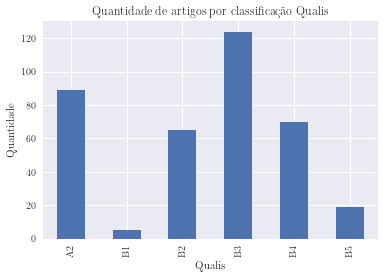

In [13]:
ax = qualis.plot(kind='bar')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de artigos por classificação Qualis')
plt.savefig('../img/artigos_qualis.png', dpi = 150, bbox_inches='tight')

plt.show()

## Autores

In [10]:
df['Qtd. de Autores'].describe()

count    372.000000
mean       3.056452
std        1.134861
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: Qtd. de Autores, dtype: float64

In [11]:
qtd_autores_media = df['Qtd. de Autores'].mean()
qtd_autores_min = df['Qtd. de Autores'].min()
qtd_autores_max = df['Qtd. de Autores'].max()
qtd_autores_std = df['Qtd. de Autores'].std()

print(f'A quantidade de autores encontra-se no intervalo de 1 a 6 autores por artigo. A quantidade média foi de {qtd_autores_media:.1f} autores por artigo, com desvio padrão de {qtd_autores_std:.1f}. Aproximadamente 50% dos artigos foram escritos por 2, 3 ou 4 pesquisadores.')

A quantidade de autores encontra-se no intervalo de 1 a 6 autores por artigo. A quantidade média foi de 3.1 autores por artigo, com desvio padrão de 1.1. Aproximadamente 50% dos artigos foram escritos por 2, 3 ou 4 pesquisadores.


## Afiliação

In [12]:
def calcular_afiliacao(df):
    lista = []
    for i in range(1, 7):
        lista += df[f'Afiliação {i}'].to_list()
    lista = [_ for _ in lista if _ != '']

    afiliacao = pd.DataFrame(lista, columns=['Afiliação'])
    afiliacao_count = afiliacao.value_counts()[:10].reset_index().rename(columns={0:'Count'})
    return afiliacao_count

In [13]:
afiliacao_count = calcular_afiliacao(df)
afiliacao_count

,Afiliação,Count
0,Universidade Federal de Santa Catarina,75
1,Universidade Federal do Ceará,39
2,Universidade Federal do Paraná,37
3,Universidade Regional de Blumenau,30
4,Universidade de São Paulo,22
5,Universidade de Brasília,21
6,Universidade Federal de Uberlândia,20
7,Universidade Federal de Minas Gerais,17
8,Fucape Business School,17
9,Universidade Federal de Pernambuco,14


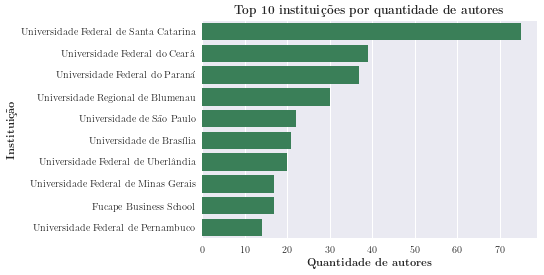

In [14]:
ax = sns.barplot(y='Afiliação', x='Count', data=afiliacao_count, color='seagreen')
ax.set_ylabel(r'\textbf{Instituição}')
ax.set_xlabel(r"\textbf{Quantidade de autores}")
ax.set_title(r'\textbf{Top 10 instituições por quantidade de autores}')
plt.xticks()
plt.savefig('../img/top10_instituicoes.png', dpi = 150, bbox_inches='tight')
plt.show()


## Nuvem de palavras

In [15]:
palavras_chave = []
for item in df['Palavras-chave'].to_list():
    aux = item.split('.')
    palavras_chave += [_.strip() for _ in aux if _ != '']

    
palavras_df = pd.DataFrame(palavras_chave, columns=['Palavras'])
palavras_count = palavras_df.value_counts()[:10].reset_index().rename(columns={0:'Count'})
palavras_count.to_csv('../palavras_mais_frequentes.csv', index=False)
palavras_count

,Palavras,Count
0,Sustentabilidade,23
1,Contabilidade,11
2,Contabilidade Ambiental,10
3,Gestão Ambiental,10
4,Evidenciação,10
5,Disclosure,8
6,Relato Integrado,7
7,Relatório de Sustentabilidade,7
8,Balanço Social,6
9,Divulgação,6


In [16]:
comment_words = ''
stopwords = set(stopwords.words('portuguese'))

In [17]:
for val in df['Palavras-chave']:
    val = str(val.replace('.', ''))
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()  

    comment_words += " ".join(tokens)+" "

In [18]:
wordcloud = WordCloud(width = 1000, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 6).generate(comment_words)

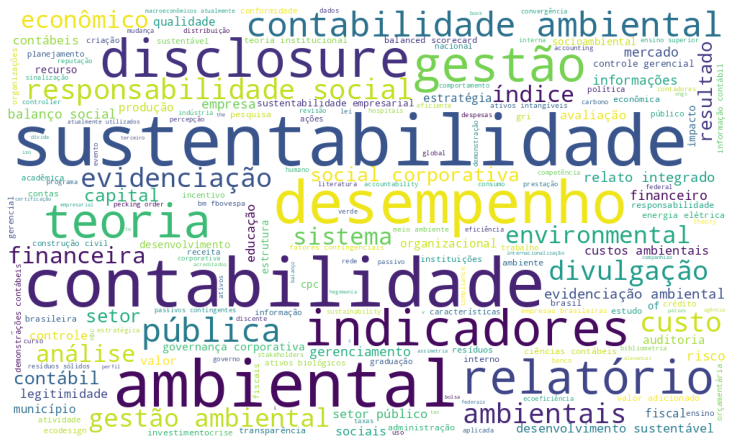

In [19]:
# plot the WordCloud image                      
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('../img/nuvem.png', dpi = 150, bbox_inches='tight')

plt.show()

## Artigos por ano

In [20]:
artigos_ano = df['Data de Publicação'].groupby([df['Data de Publicação'].dt.year]).agg('count')

In [21]:
artigos_ano

Data de Publicação
2012    26
2013    31
2014    50
2015    39
2016    47
2017    36
2018    28
2019    43
2020    40
2021    32
Name: Data de Publicação, dtype: int64

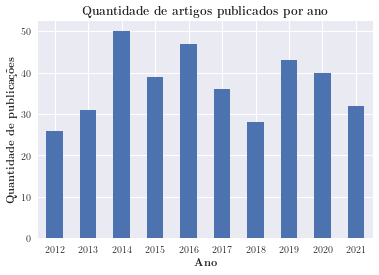

In [22]:
ax = artigos_ano.plot.bar()
ax.set_xlabel(r'\textbf{Ano}')
ax.set_ylabel(r'\textbf{Quantidade de publicações}')
ax.set_title(r'\textbf{Quantidade de artigos publicados por ano}')
plt.xticks(rotation=0)
plt.savefig('../img/artigos_por_ano.png', dpi = 150, bbox_inches='tight')

plt.show()

In [23]:
artigos_ano.describe()

count    10.000000
mean     37.200000
std       8.038795
min      26.000000
25%      31.250000
50%      37.500000
75%      42.250000
max      50.000000
Name: Data de Publicação, dtype: float64

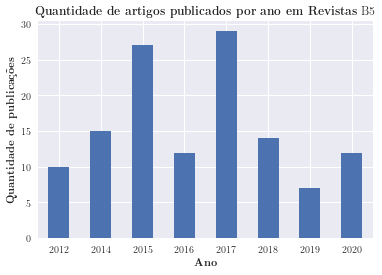

In [73]:
for qualis in np.sort(df['Qualis'].unique()):
    x = df[df['Qualis']==qualis]
    artigos_ano_2 = x['Data de Publicação'].groupby([x['Data de Publicação'].dt.year]).agg('count')
    
    ax = artigos_ano_2.plot.bar()
    ax.set_xlabel(r'\textbf{Ano}')
    ax.set_ylabel(r'\textbf{Quantidade de publicações}')
    ax.set_title(r'\textbf{Quantidade de artigos publicados por ano em Revistas }' + qualis)
    plt.xticks(rotation=0)
    plt.savefig(f'../img/artigos_por_ano_{qualis}.png', dpi = 150, bbox_inches='tight')

## Publicações por revista

In [24]:
revistas = df['Revista'].value_counts().reset_index()
revistas.columns = ['Revista', 'Qtd. de Publicações']
revistas['Revista'] = revistas['Revista'].str.replace('&', 'e')
revistas.to_csv('../revistas.csv', index=False)
revistas

,Revista,Qtd. de Publicações
0,Revista de Contabilidade e Organizações – RCO,56
1,Revista Ambiente Contábil,45
2,"Revista de Administração, Contabilidade e Econ...",39
3,Revista Mineira de Contabilidade – RMC,28
4,Revista de Contabilidade da UFBA,25
5,Advances in Scientific and Applied Accounting ...,23
6,"Revista de Administração, Contabilidade e Sust...",23
7,CAP Accounting and Management,21
8,Revista Catarinense da Ciência Contábil,20
9,ConTexto,14


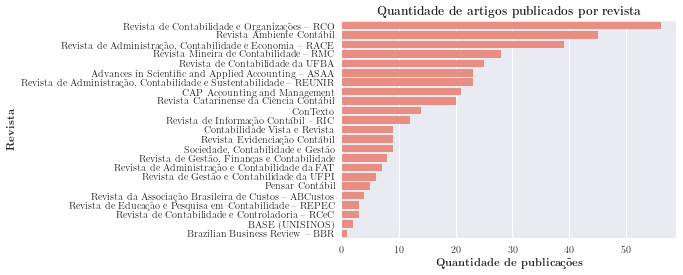

In [25]:
ax = sns.barplot(y='Revista', x='Qtd. de Publicações', data=revistas, color='salmon')
ax.set_ylabel(r'\textbf{Revista}')
ax.set_xlabel(r'\textbf{Quantidade de publicações}')
ax.set_title(r'\textbf{Quantidade de artigos publicados por revista}')
plt.xticks()
plt.savefig('../img/artigos_por_revista.png', dpi = 150, bbox_inches='tight')

plt.show()

In [25]:
df2 = df = importar_arquivos()
df2.shape

(372, 26)

In [26]:
df2.dropna()

,Data de Publicação,Título,Resumo,Palavras-chave,Qtd. de Autores,Autor 1,Autor 2,Autor 3,Autor 4,Autor 5,...,Afiliação 6,Url Artigo,Revista,Afilição 1,Afilição 2,Afilição 3,Afilição 4,Afilição 5,Afilição 6,url
